## Bike Sharing Assignment

<b>PROBLEM STATEMENT:</b>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. 

So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 1: Reading the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data from the csv file.

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check the shape of the data, as to the number of rows and the number of columns.

bike.shape

(730, 16)

<b>Observation:</b> We see that the data has 730 rows and 16 columns

In [5]:
# Check the data types of all the columns, along with other data description

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<b> Observation:</b> We see that all 16 columns have no NULL values and hence we do not need to handle the null values

In [6]:
# Check the statistical description of all the columns of the data giving the min, max and percentile information.

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Understanding the Data

#### 2.1 Inspect NULL Values

In [7]:
column_null_percentage = round(100*(bike.isnull().sum()/len(bike.index)), 2)
print("Column_Null_Percentage: \n", column_null_percentage.head(60))

Column_Null_Percentage: 
 instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


#### OBSERVATIONS:
- There are no NULL values in the dataset.

#### 2.2 Drop Unnecessary columns to get filtered data

Here, we know that casual and registered are not uselful in modeling process as these are just number of users and unlikely to be the factor that directly causes rise in the number of bike rentals. Most likely these variables will grow in value along with bike rentals and that change in value is likely to be caused by different factors.

In [8]:
# Dropping the unnecessary columns from the bike data.

bike = bike.drop(columns=['instant', 'dteday', 'casual', 'registered'])

<b> Reasons for dropping the above columns: </b>

1. <b>instant:</b> cannot contribute to the count, as this is nothing but an index.
2. <b>dteday:</b> this is already covered in other columns like year and month.
3. <b>causal:</b> this can not be contributing to the target variable, as this is nothing but a fraction of cnt.
4. <b>registered:</b> this is same as cnt of casual customers and we cannot be using this as contributor factor to the target variable.

#### 2.3 Segregation of categorical and continous columns

In [9]:
# Get the list of all columns of then dataset after dropping few columns

bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

From the columns above, we can see following:
    
1. <b> Categorical Columns: </b> season, month, weekday, weathersit
2. <b> Binary columns: </b> yr, holiday, workingday
3. <b> Continous columns: </b> temp/atemp, hum, windspeed

#### Dealing with Categorical Variables
We can convert these variables to their corresponding mapping, in order to use them further for model creation.

In [10]:
# Mapping the categorical variables to specific categories.

bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

bike['weathersit'] = bike['weathersit'].map({1:'Good', 2:'Fair', 3:'Bad', 4:'Severe'})

bike['mnth'] = bike['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'July', 8: 'Aug',
                                    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

bike['weekday'] = bike['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Fair,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Fair,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Again check the data type of all the columns.

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Dealing with Binary Variables
We do not need to make any change to the binary variables and they can be used as it is for the model creation

#### Dealing with Continous Variables
We need to normalize these variables in order to use them for model creation. This has been done later in the assignment.

#### 2.4 Checking for outliers

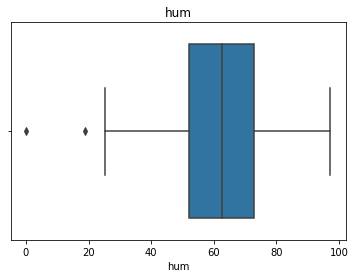

0.50    62.625000
0.70    70.750000
0.90    81.762500
0.95    86.868735
0.99    92.795857
1.00    97.250000
Name: hum, dtype: float64

In [18]:
# Checking outlier for humidity
plt.title("hum")
sns.boxplot(bike.hum)
plt.show()

# checking the quantile values for work experience
bike.hum.quantile([0.5,0.7,0.9,0.95,0.99,1])

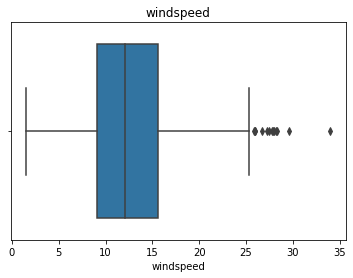

0.50    12.125325
0.70    14.971271
0.90    19.833997
0.95    22.999988
0.99    27.380948
1.00    34.000021
Name: windspeed, dtype: float64

In [17]:
# checking for windspeed
plt.title("windspeed")
sns.boxplot(bike.windspeed)
plt.show()

# checking the quantile values for work experience
bike.windspeed.quantile([0.5,0.7,0.9,0.95,0.99,1])

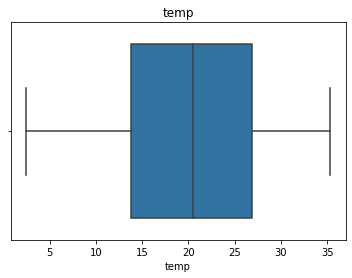

0.50    20.465826
0.70    25.898347
0.90    29.998347
0.95    31.520460
0.99    33.868050
1.00    35.328347
Name: temp, dtype: float64

In [19]:
# checking for temp
plt.title("temp")
sns.boxplot(bike.temp)
plt.show()

# checking the quantile values for work experience
bike.temp.quantile([0.5,0.7,0.9,0.95,0.99,1])

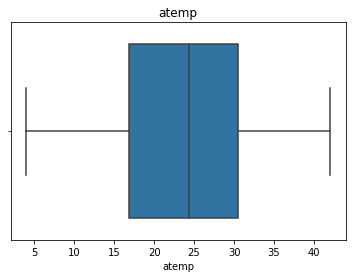

0.50    24.368225
0.70    29.407020
0.90    33.908210
0.95    35.749975
0.99    38.941650
1.00    42.044800
Name: atemp, dtype: float64

In [20]:
# checking for atemp
plt.title("atemp")
sns.boxplot(bike.atemp)
plt.show()

# checking the quantile values for work experience
bike.atemp.quantile([0.5,0.7,0.9,0.95,0.99,1])

#### OBSERVATIONS:
- For humidity, we see minimal outliers and decide to leave them as it is for now.
- For windspeed, we see some outliers, but imputing it with some quantile value is not correct as they are very close knit.
- No outliers found for temp and atemp features.

## Step 3: Visualization the Data

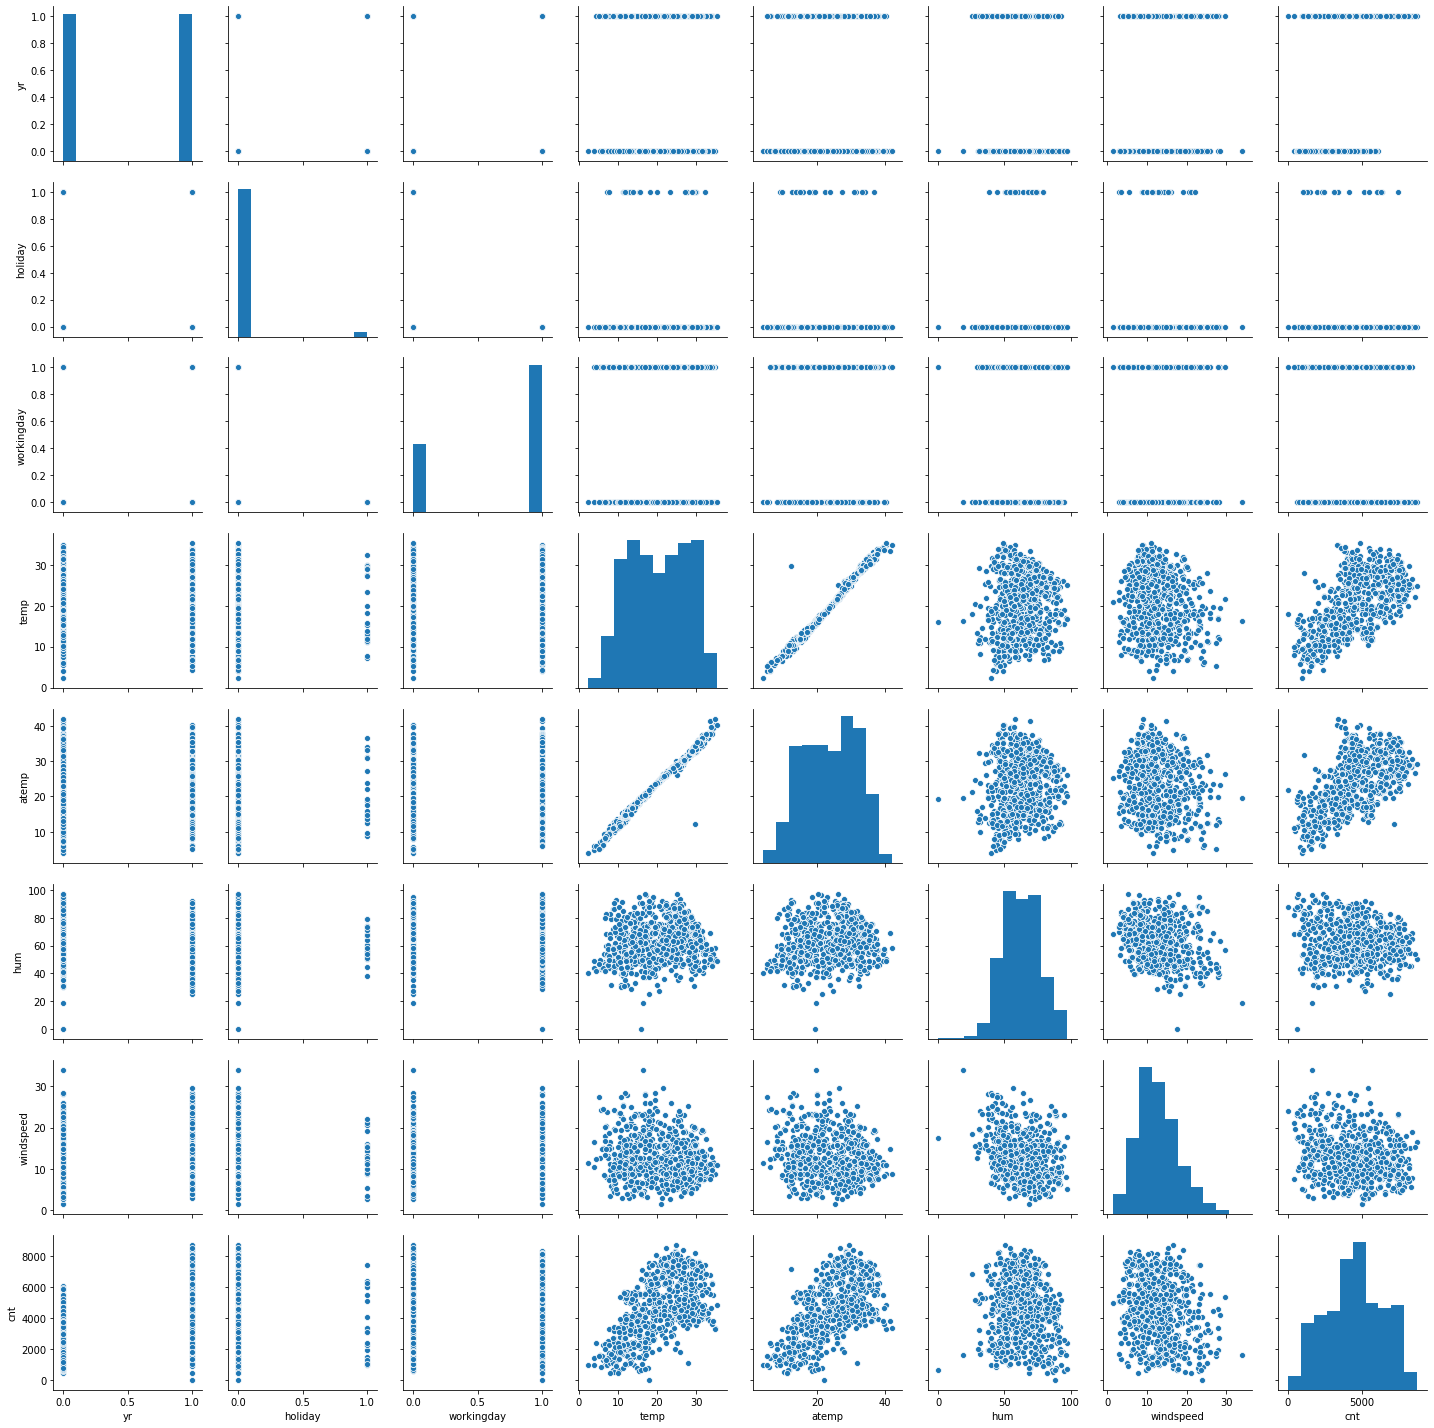

In [21]:
# Visualize using the pairplot.

sns.pairplot(bike)

#### Visualization of the Categorical Variables

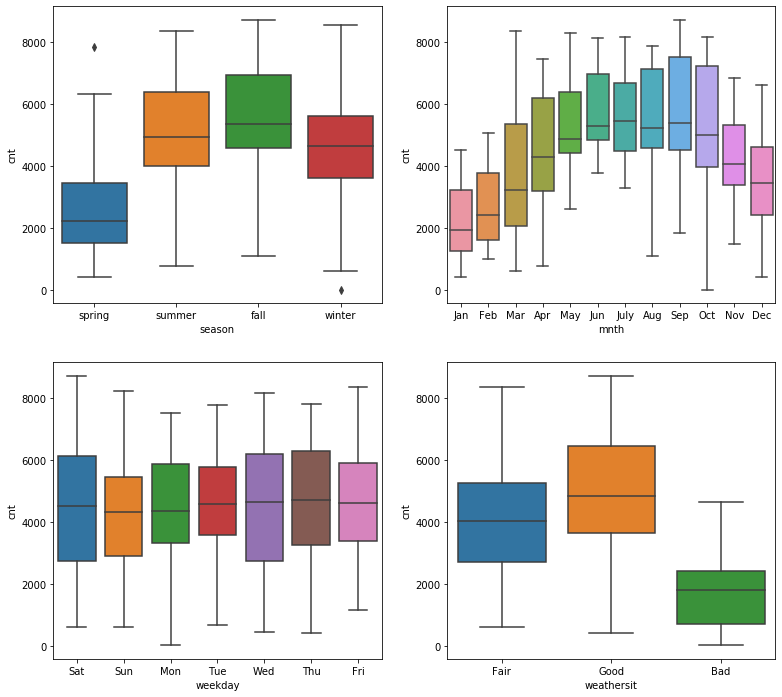

In [22]:
# Visualize the categorical variables.

plt.figure(figsize=(20, 12))

# plot season and see the boxplot
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)

# plot mnth and see the boxplot
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)

# plot the weekday
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)

# plot the weather situation in boxplot
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

plt.show()

<b> Observations: </b>

1. <b> Season: </b> We see that the sales of bike is highest in fall and lowest in spring. It is more in summer than winter. Indicating that this could be one of the driving factors for the target variable.
2. <b> Month: </b> All the months have different variation for cnt of the bikes. It being highest for the month of September, followed by October to being lowest for January.
3. <b> Weekday: </b> There is some trend of target variable even with weekday, but yes, the cnt is more for weekdays than weekends. This is an interesting insight and should be considered will model creation.
4. <b> Weather Situation: </b> We observe that there is absolute no count for severe weather condition. Good substantial number or Good weather situation and then decreases for Bad weather situation.

#### Visualization of Binary variables.

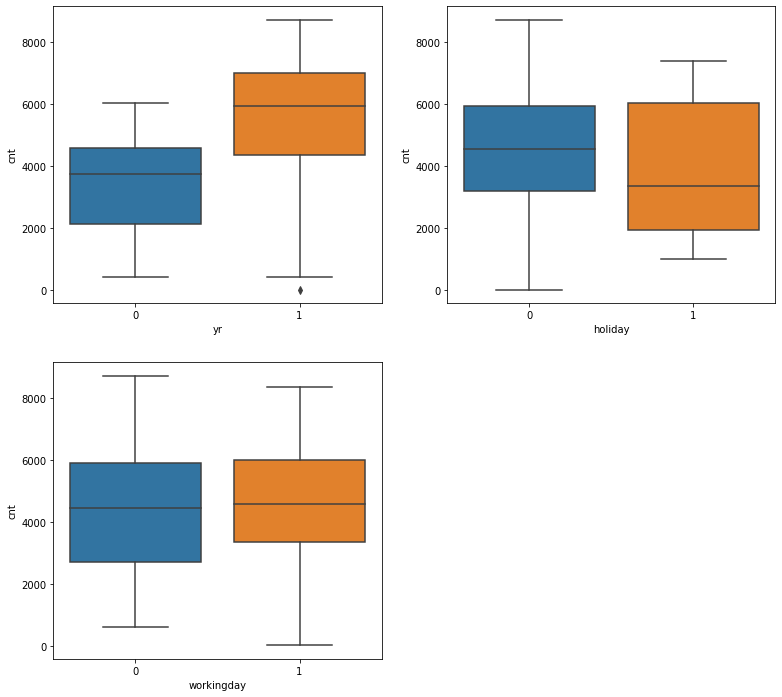

In [23]:
# Visualize the binary variables.

plt.figure(figsize=(20, 12))

# plot year and see the boxplot
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)

# plot holiday and see the boxplot
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)

# plot the working day
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)

plt.show()

#### Observations:
1. 2019 has contributed more than 2018
2. Non-holidays were contrbuting more to the sale of bikes.
3. People opted for this facility more on a working day than a non-working day. 

#### Check the Correlation of different variables

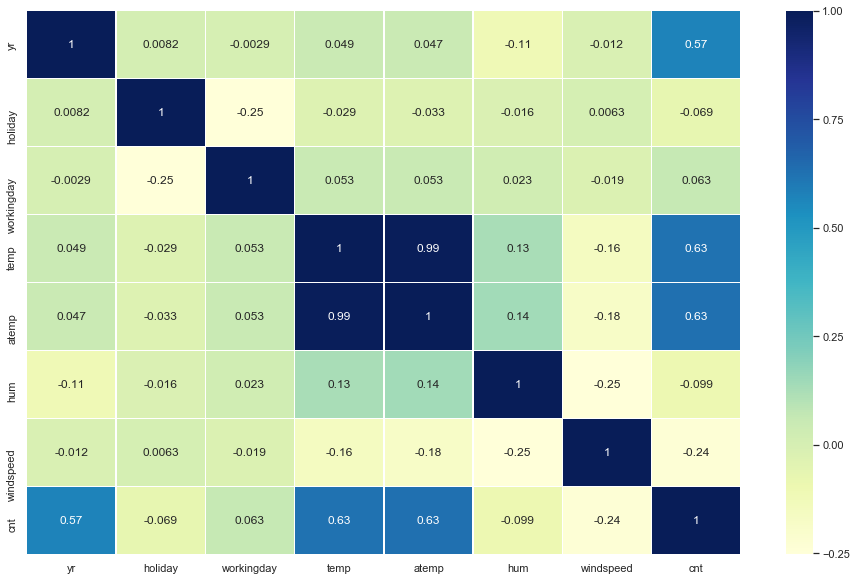

In [24]:
# Plot the correlation matrix

plt.figure(figsize = (16, 10))

sns.set(font_scale=1) 
ax = sns.heatmap(bike.corr(), annot=True, cmap="YlGnBu", linewidth=0.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

<b> Observations: </b>
1. We can clearly see that temp and atemp are highly correlated and have high collinearity and hence we can drop one of them.
2. We also see that cnt is highly related to yr parameter (binary one)
3. We see that cnt is negatively corrleated to windspeed indicating that on high windspeed, the cnt decreases.

#### Check the variation of temp and atemp to drop one of them.

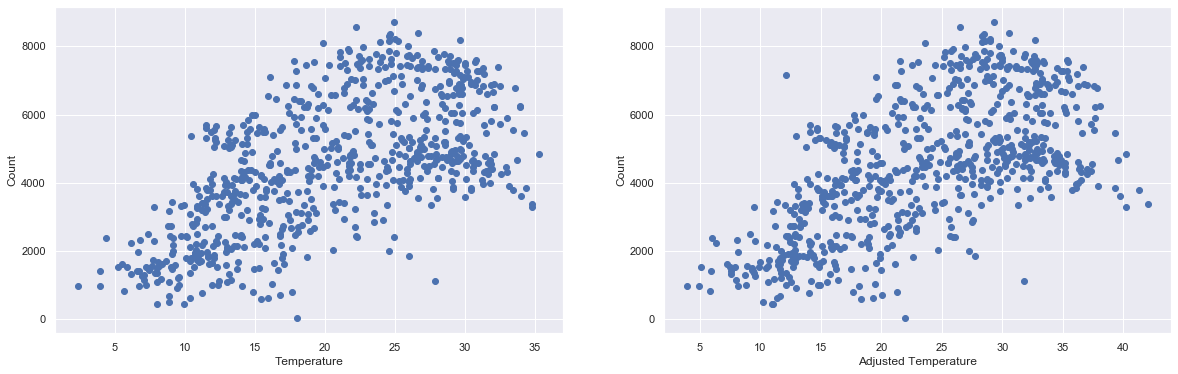

In [25]:
# Scatter plot of temp and atemp with cnt (target variable)

plt.figure(figsize =[20,6])

plt.subplot(1,2,1)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.scatter(bike.temp, bike.cnt)

plt.subplot(1,2,2)
plt.xlabel('Adjusted Temperature')
plt.ylabel('Count')
plt.scatter(bike.atemp, bike.cnt)

plt.show()

<b> Observations: </b>
1. Here, we see that they have almost the similiar trend.
2. Dropping atemp variable
3. Use temp variable for model creation ahead

In [26]:
# Dropping atemp.

bike = bike.drop(columns=['atemp'])
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Step 4: Data Preparation

#### Dummy variables 

In [27]:
# create dummy variables for categorical variables.

# creating for season variable
season_dummy = pd.get_dummies(bike['season'], drop_first = True)
print(season_dummy.head())

# concat the dummy variable with original dataset and drop the season against which these dummy variables have been calculated.
bike = pd.concat([bike, season_dummy], axis = 1)
bike.drop(['season'], axis = 1, inplace = True)
bike.head()

   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0


,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Sat,0,Fair,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Sun,0,Fair,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Mon,1,Good,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Tue,1,Good,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Wed,1,Good,9.305237,43.6957,12.522300,1600,1,0,0


In [28]:
# creating for month variable

mnth_dummy = pd.get_dummies(bike['mnth'], drop_first = True)
print(mnth_dummy.head())

# concat the dummy variable with original dataset and drop the season against which these dummy variables have been calculated.
bike = pd.concat([bike, mnth_dummy], axis = 1)
bike.drop(['mnth'], axis = 1, inplace = True)
bike.head()

   Aug  Dec  Feb  Jan  July  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1     0    0    0    0    0    0    0
1    0    0    0    1     0    0    0    0    0    0    0
2    0    0    0    1     0    0    0    0    0    0    0
3    0    0    0    1     0    0    0    0    0    0    0
4    0    0    0    1     0    0    0    0    0    0    0


,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep
0,0,0,Sat,0,Fair,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sun,0,Fair,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Mon,1,Good,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tue,1,Good,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wed,1,Good,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [29]:
# creating for weekday variable

weekday_dummy = pd.get_dummies(bike['weekday'], drop_first = True)
print(weekday_dummy.head())

# concat the dummy variable with original dataset and drop the season against which these dummy variables have been calculated.
bike = pd.concat([bike, weekday_dummy], axis = 1)
bike.drop(['weekday'], axis = 1, inplace = True)
bike.head()

   Mon  Sat  Sun  Thu  Tue  Wed
0    0    1    0    0    0    0
1    0    0    1    0    0    0
2    1    0    0    0    0    0
3    0    0    0    0    1    0
4    0    0    0    0    0    1


,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,Fair,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,Fair,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,Good,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,Good,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,Good,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# creating for weathersit variable

weather_dummy = pd.get_dummies(bike['weathersit'], drop_first = True)
print(weather_dummy.head())

# concat the dummy variable with original dataset and drop the season against which these dummy variables have been calculated.
bike = pd.concat([bike, weather_dummy], axis = 1)
bike.drop(['weathersit'], axis = 1, inplace = True)
bike.head()

   Fair  Good
0     1     0
1     1     0
2     0     1
3     0     1
4     0     1


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Fair,Good
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [31]:
# Check the final columns of the data

bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed', 'Fair', 'Good'],
      dtype='object')

In [32]:
bike.shape

(730, 29)

In [33]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
yr            730 non-null int64
holiday       730 non-null int64
workingday    730 non-null int64
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
spring        730 non-null uint8
summer        730 non-null uint8
winter        730 non-null uint8
Aug           730 non-null uint8
Dec           730 non-null uint8
Feb           730 non-null uint8
Jan           730 non-null uint8
July          730 non-null uint8
Jun           730 non-null uint8
Mar           730 non-null uint8
May           730 non-null uint8
Nov           730 non-null uint8
Oct           730 non-null uint8
Sep           730 non-null uint8
Mon           730 non-null uint8
Sat           730 non-null uint8
Sun           730 non-null uint8
Thu           730 non-null uint8
Tue           730 non-null uint8
Wed           730 non-null uint

#### Observation:
After adding dummy variables, the number of columns increased to 29 from initial 16 we started with.

## Step 5: Splitting the data into Training and Testing sets

In [34]:
#Splitting the dataset

from sklearn.model_selection import train_test_split

np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state=100)

In [35]:
print("Dimensions of training set: ", bike_train.shape)
print("Dimensions of testing set: ", bike_test.shape)

Dimensions of training set:  (510, 29)
Dimensions of testing set:  (219, 29)


### Rescaling the Features

In [37]:
# fetch the relevant library to get the MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
# perform the min-max scaling on continuous variables.

cont_vars = ['cnt', 'temp', 'hum', 'windspeed']
bike_train[cont_vars] = scaler.fit_transform(bike_train[cont_vars])

In [39]:
# Check how the values have been normalized.

print(bike_train.describe())

               yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.650369    0.320768   
std      0.500429    0.157763    0.468282    0.225844    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.540519    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer     winter  ...         Oct  \
count  510.000000  510.000000  510.000000  510.00000  ...  510.000000   
mean     0.513620    0.243137    0.245098    0.24902  ...    0.086275   
std      0.224593    0.429398    0.430568    0.4328

## Step 6: Data Modelling

#### Model0: Creating the first model with temp as a variable.

In [40]:
# fetch the X and y. Here X is temp and y is cnt.

y = bike_train['cnt']
X = bike_train['temp']

# import the library
import statsmodels.api as sm

# Add a constant
X = sm.add_constant(X)
lr_0 = sm.OLS(y, X).fit()

In [41]:
# Get the value of params. Fetch the sumaary giving details of r-squared value and significance of param.

print("\nParams: \n", lr_0.params)
print("\nSummary: \n", lr_0.summary())


Params: 
 const    0.169798
temp     0.639952
dtype: float64

Summary: 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           5.80e-61
Time:                        16:32:02   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

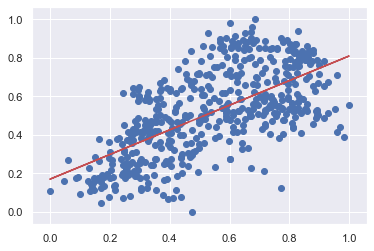

In [42]:
# draw the line on scatter plot of temp and cnt to see the fit.

plt.scatter(X.iloc[:, 1], y)
plt.plot(X.iloc[:, 1], 0.169798 + 0.639952*X.iloc[:, 1], 'r')
plt.show()

#### Since the R sqaure value is too less, hence we go by the RFE method and see the model creation

#### Model2: Using RFE, starting with 15 random variables to see the model results.

In [43]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Dividing into X and Y sets for the model building

In [44]:
# divide the x and y train sets. With y having only the cnt column and x having all other columns of the dataset.

y_train = bike_train.pop('cnt')
X_train = bike_train

In [45]:
# Running RFE with the output number of the variable equal to 10 (as 10 is a good number of variables to have the model with)

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [46]:
# List of all columns with rfe ranking.

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Fair', True, 1),
 ('Good', True, 1)]

In [47]:
# columns that have been considered according to rfe support. These are 10 such columns.
col = X_train.columns[rfe.support_]
print('Columns considered in model creation: ', col)

# columns that have not been taken for model creation.
X_train.columns[~rfe.support_]
print('Columns not considered: ', X_train.columns[~rfe.support_])

Columns considered in model creation:  Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'July', 'Sep', 'Sat', 'Fair', 'Good'],
      dtype='object')
Columns not considered:  Index(['Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')


### Model 1 with 15 variables

In [48]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model
lm_1 = sm.OLS(y_train, X_train_lm).fit()   

In [49]:
# Get the value of params. Fetch the sumaary giving details of r-squared value and significance of param.

print("\nParams: \n", lm_1.params)
print("\nSummary: \n", lm_1.summary())


Params: 
 const         0.002264
yr            0.230502
holiday      -0.058529
workingday    0.043521
temp          0.509836
hum          -0.154716
windspeed    -0.185956
spring       -0.050806
summer        0.049660
winter        0.094426
Jan          -0.034326
July         -0.053193
Sep           0.081186
Sat           0.053721
Fair          0.190953
Good          0.248777
dtype: float64

Summary: 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.31e-191
Time:                        16:32:19   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   B

### Checking VIF

In [50]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_columns = X_train_rfe

vif = pd.DataFrame()
vif['Features'] = vif_columns.columns
vif['VIF'] = [variance_inflation_factor(vif_columns.values, i) for i in range(vif_columns.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print("\n VIF Values are: \n\n", vif)


 VIF Values are: 

       Features    VIF
4          hum  25.64
3         temp  22.83
14        Good  14.85
13        Fair   9.02
6       spring   5.69
2   workingday   5.42
5    windspeed   4.68
8       winter   4.14
7       summer   3.20
0           yr   2.10
12         Sat   2.00
9          Jan   1.70
10        July   1.59
11         Sep   1.40
1      holiday   1.19


#### OBSERVATIONS for lm_1:
1. With 15 random columns we see the model to be highly significant.
2. The value of R square is 84.9% which is a good one. This means that the model is able to explian 84.9% of the variance in the data.
3. Adjusted R2 being 84.4%
4. We also observe that column Jan is not so significant as p-value is 0.048. We also observe that the VIF value is too high for variables like hum, temp and Good weather situation.
But giving priority to p-value we first rebuild the model eliminating Jan from the dataset. 

### Model 2 after dropping Jan feature

In [52]:
#Drop Jan from the dataset and rebuild the model.
X_train_new = X_train_rfe.drop(["Jan"], axis = 1)

In [53]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm_2 = sm.OLS(y_train, X_train_lm).fit()

# Get the value of params. Fetch the summary giving details of r-squared value and significance of param.
print("\nParams: \n", lm_2.params)
print("\nSummary: \n", lm_2.summary())


Params: 
 const        -0.006953
yr            0.229738
holiday      -0.059434
workingday    0.043216
temp          0.527819
hum          -0.159467
windspeed    -0.180601
spring       -0.055434
summer        0.052613
winter        0.100294
July         -0.054881
Sep           0.081773
Sat           0.053203
Fair          0.188485
Good          0.246332
dtype: float64

Summary: 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.13e-191
Time:                        16:32:28   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                    

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_columns = X_train_new

vif = pd.DataFrame()
vif['Features'] = vif_columns.columns
vif['VIF'] = [variance_inflation_factor(vif_columns.values, i) for i in range(vif_columns.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print('\n\n VIF Values are: \n\n', vif)



 VIF Values are: 

       Features    VIF
4          hum  25.03
3         temp  21.43
13        Good  14.49
12        Fair   8.87
6       spring   5.53
2   workingday   5.41
5    windspeed   4.66
8       winter   4.05
7       summer   3.18
0           yr   2.09
11         Sat   2.00
9         July   1.59
10         Sep   1.40
1      holiday   1.18


#### OBSERVATIONS:
1. After removal of Jan, the R2 and adjusted R2 are still good and explain 84.7% of variance in the data
2. Variables have good significance and contribute to model creation except of variables like holiday (p-value as 0.028), spring(.007), etc.
3. We also see variables like hum, Good, etc with high VIF values.
4. Again giving priority to p-value, we proceed with recreation of the model by dropping holiday variable.

### Model 3 after dropping holiday from above feature set

In [55]:
# Drop holiday and rebuild the model
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [56]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm_3 = sm.OLS(y_train, X_train_lm).fit()   

#Let's see the summary of our linear model
print("\nParams: \n", lm_3.params)
print("\nSummary: \n", lm_3.summary())


Params: 
 const        -0.015714
yr            0.229966
workingday    0.052059
temp          0.527923
hum          -0.157829
windspeed    -0.181186
spring       -0.056504
summer        0.052962
winter        0.099338
July         -0.053732
Sep           0.079694
Sat           0.062161
Fair          0.187960
Good          0.245533
dtype: float64

Summary: 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.51e-192
Time:                        16:32:37   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_columns = X_train_new

vif = pd.DataFrame()
vif['Features'] = vif_columns.columns
vif['VIF'] = [variance_inflation_factor(vif_columns.values, i) for i in range(vif_columns.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print('\n\n VIF Values are: \n\n', vif)



 VIF Values are: 

       Features    VIF
3          hum  25.00
2         temp  21.42
12        Good  14.35
11        Fair   8.83
5       spring   5.51
1   workingday   4.79
4    windspeed   4.65
7       winter   4.03
6       summer   3.18
0           yr   2.09
10         Sat   1.85
8         July   1.59
9          Sep   1.39


#### OBSERVATIONS:
1. After removal of holiday, we see that r2 comes to 84.6%
2. Significance of variables is also good. With spring having 0.006 value.
3. VIF values shows high ranges for variables like hum, temp, Good, etc.
4. Let's remove Spring and recreate the model.

### Model 4 after dropping Spring from the feature set

In [58]:
X_train_new = X_train_new.drop(["spring"], axis = 1)

In [59]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm_4 = sm.OLS(y_train, X_train_lm).fit()   

#Let's see the summary of our linear model
print("\nParams: \n", lm_4.params)
print("\nSummary: \n", lm_4.summary())


Params: 
 const        -0.069908
yr            0.228561
workingday    0.052672
temp          0.595972
hum          -0.169301
windspeed    -0.188493
summer        0.081522
winter        0.136490
July         -0.044207
Sep           0.092589
Sat           0.062678
Fair          0.185339
Good          0.240438
dtype: float64

Summary: 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.26e-191
Time:                        16:32:45   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                      

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_columns = X_train_new

vif = pd.DataFrame()
vif['Features'] = vif_columns.columns
vif['VIF'] = [variance_inflation_factor(vif_columns.values, i) for i in range(vif_columns.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print('\n\n VIF Values are: \n\n', vif)



 VIF Values are: 

       Features    VIF
3          hum  18.68
2         temp  10.67
11        Good  10.20
10        Fair   7.56
1   workingday   4.75
4    windspeed   4.19
0           yr   2.07
9          Sat   1.84
5       summer   1.76
6       winter   1.71
7         July   1.55
8          Sep   1.29


#### OBSERVATIONS:
1. After removal of Spring, we see that R2 value is 84.4% and lies in a good considerable range.
2. But what we observe here is that p value for July increases to 0.014 making it insigificant.
3. We would remove this and recreate the model to see the updated params value.

### Model 5 after dropping July from the feature set

In [61]:
X_train_new = X_train_new.drop(["July"], axis = 1)

In [62]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm_5 = sm.OLS(y_train, X_train_lm).fit()   

#Let's see the summary of our linear model
print("\nParams: \n", lm_5.params)
print("\nSummary: \n", lm_5.summary())


Params: 
 const        -0.074069
yr            0.229437
workingday    0.053557
temp          0.570880
hum          -0.161282
windspeed    -0.186078
summer        0.089914
winter        0.140652
Sep           0.102541
Sat           0.063047
Fair          0.188576
Good          0.243890
dtype: float64

Summary: 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.89e-191
Time:                        16:32:51   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                 

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_columns = X_train_new

vif = pd.DataFrame()
vif['Features'] = vif_columns.columns
vif['VIF'] = [variance_inflation_factor(vif_columns.values, i) for i in range(vif_columns.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print('\n\n VIF Values are: \n\n', vif)



 VIF Values are: 

       Features    VIF
3          hum  18.54
10        Good  10.19
2         temp   8.43
9         Fair   7.55
1   workingday   4.75
4    windspeed   4.19
0           yr   2.07
8          Sat   1.84
6       winter   1.66
5       summer   1.58
7          Sep   1.21


#### Observations:
1. In the above model with 11 variables, we observe that the R2 value is 84.2% with adjusted R2 as 83.8%.
2. All the variables are significant (pvalue is 0.000)
3. We check that the VIF value is more than 5 for 4 variables i.e. hum, Good, temp, Fair.
4. Next, we eliminate the hum variables with highest VIF value to see the updated model.

### Model 6 after dropping humidity from the feature set

In [64]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [65]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm_6 = sm.OLS(y_train, X_train_lm).fit()   

#Let's see the summary of our linear model
print("\nParams: \n", lm_6.params)
print("\nSummary: \n", lm_6.summary())


Params: 
 const        -0.212696
yr            0.233056
workingday    0.056323
temp          0.549936
windspeed    -0.155238
summer        0.087429
winter        0.131826
Sep           0.097236
Sat           0.067688
Fair          0.206674
Good          0.288021
dtype: float64

Summary: 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.47e-188
Time:                        16:32:58   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                        

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_columns = X_train_new

vif = pd.DataFrame()
vif['Features'] = vif_columns.columns
vif['VIF'] = [variance_inflation_factor(vif_columns.values, i) for i in range(vif_columns.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print('\n\n VIF Values are: \n\n', vif)



 VIF Values are: 

      Features   VIF
9        Good  8.23
2        temp  6.86
8        Fair  4.82
1  workingday  4.56
3   windspeed  4.14
0          yr  2.06
7         Sat  1.81
4      summer  1.57
5      winter  1.45
6         Sep  1.20


#### Observations:
1. R2 with these 10 variables is 83.6% and adjusted R2 is 83.2%
2. All variables are highly significant with p-value is 0.000
3. VIF for 2 variables i.e. Good and temp is above 5 and hence they should not be ignored.
4. Let's rebulid the model removing Good variable and seeing the updated R values.

### Model 7 after dropping Good (based on VIF value)

In [67]:
X_train_new = X_train_new.drop(["Good"], axis = 1)

In [68]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm_7 = sm.OLS(y_train, X_train_lm).fit()   

#Let's see the summary of our linear model
print("\nParams: \n", lm_7.params)
print("\nSummary: \n", lm_7.summary())


Params: 
 const         0.078780
yr            0.238855
workingday    0.048180
temp          0.551472
windspeed    -0.183950
summer        0.087459
winter        0.117415
Sep           0.087373
Sat           0.059280
Fair         -0.067655
dtype: float64

Summary: 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.01e-163
Time:                        16:33:04   Log-Likelihood:                 437.74
No. Observations:                 510   AIC:                            -855.5
Df Residuals:                     500   BIC:                            -813.1
Df Model:                           9                                         
Covariance Type:     

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_columns = X_train_new

vif = pd.DataFrame()
vif['Features'] = vif_columns.columns
vif['VIF'] = [variance_inflation_factor(vif_columns.values, i) for i in range(vif_columns.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print('\n\n VIF Values are: \n\n', vif)



 VIF Values are: 

      Features   VIF
2        temp  4.76
1  workingday  4.02
3   windspeed  3.39
0          yr  2.01
7         Sat  1.68
4      summer  1.57
8        Fair  1.50
5      winter  1.38
6         Sep  1.20


#### Observations:
1. Now, the final model created has R2 as 79.1% and adjusted R2 as 78.7%
2. All variables are highly significant with p-value as 0.000
3. The VIF values are also good ones and no need of elimination as all are within the range of 5.

#### Now, we need to see which one to take as the final model, the one with more R2 but 2 variables with more than 5 and less than 10 VIF values or the one with less R2 but all variables within significant VIF values.

## Step 7: Residual Analysis on the train data

Here we will check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [70]:
predicted_cnt = lm_7.predict(X_train_lm)

In [71]:
# get the libraries ot see the MSE and r2 score

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_train, predicted_cnt)
r_squared = r2_score(y_train, predicted_cnt)

In [72]:
# print the error values

print('Mean_Squared_Error :' , mse)
print('r_square_value :', r_squared)

Mean_Squared_Error : 0.010519722723314811
r_square_value : 0.7910386989832588


In [78]:
# Print the adjusted R2 value of the model.
n = bike_train.shape[0]
p = X_train_new.shape[1]

adjusted_R2 = 1 - (((1-r_squared)*(n-1))/(n-p-1))
print("Adjusted R-square value: ", adjusted_R2)

Adjusted R-square value:  0.7872773955649575


#### OBSERVATIONS:
1. We see the <b>R2 value of the model is 0.79103</b>
2. The <b>Adjusted R2 value is 0.7872</b>
3. The <b>Mean Sqaure Error is 0.01051</b>

Text(0, 0.5, 'Views')

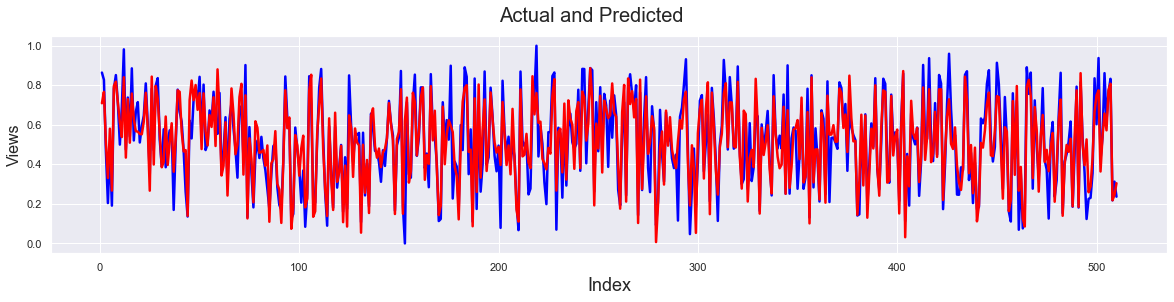

In [79]:
#Actual vs Predicted Plot for visualization of overlap in the data

c = [i for i in range(1, 511, 1)]

fig = plt.figure(figsize =[20,4])
plt.plot(c, y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, predicted_cnt, color="red",  linewidth=2.5, linestyle="-")

fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)  

#### OBSERVATIONS:
1. From the graph above, we see a complete overlap of actual data and the predicted data from the dataset. 
2. This indicates that the model has been fitted well covering all the peaks and the depths.

Text(0, 0.5, 'Views_show-Predicted_views')

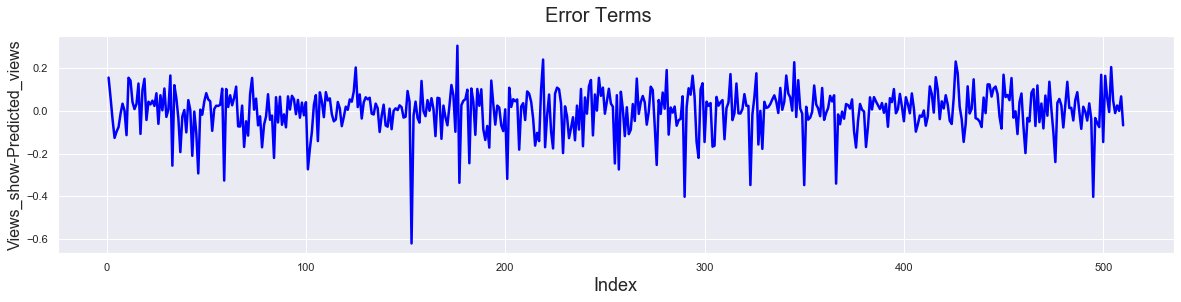

In [80]:
# Error terms

c = [i for i in range(1,511,1)]

fig = plt.figure(figsize =[20,4])
plt.plot(c, y_train-predicted_cnt, color="blue", linewidth=2.5, linestyle="-")

fig.suptitle('Error Terms', fontsize=20)                           # Plot heading 
plt.xlabel('Index', fontsize=18)                                   # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)              # Y-label

Text(0.5, 0, 'Errors')

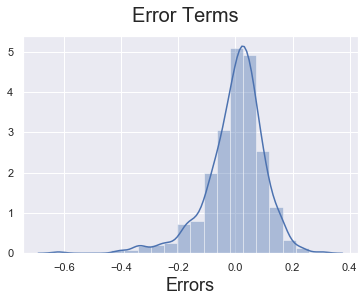

In [81]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - predicted_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

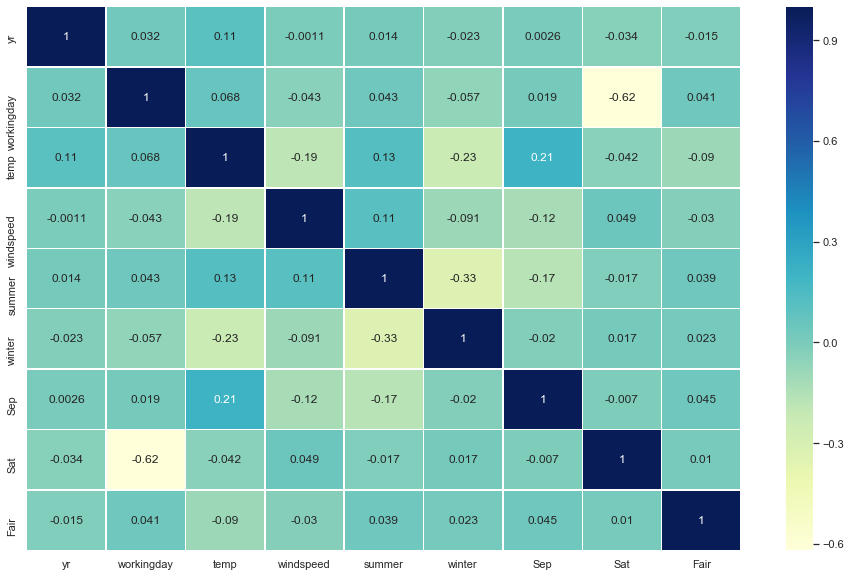

In [99]:
# Plot the correlation matrix to see multicollinearity phenomenon

plt.figure(figsize = (16, 10))

sns.set(font_scale=1) 
ax = sns.heatmap(X_train_new.corr(), annot=True, cmap="YlGnBu", linewidth=0.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

#### OBSERVATIONS:
The above error terms graph shows the following <b>assumptions of linear regression model</b>:
1. The graph has linear relation and hence <b>X and Y terms are linearly related.</b> (Assumption 1 CHECKED)
1. The Error terms are <b>normally distributed with mean equal to zero</b>. (Assumption 2 CHECKED)
2. Error Terms are <b>independent</b> of each other. (Assumption 3 CHECKED)
3. Error terms have <b>constant variance i.e. they are HOMOSCEDASTICITY</b> (Assumption 4 CHECKED)
4. Form the VIF values calculated (in cell 69) above for the final model, we observe that all values are less than 5 and hence <b>no multicollinearity.</b> This has also been supported by the correlation matrix above.

## Step 8: Making predictions using the final model

#### Making Predictions using the final model (lm_7)

In [82]:
# scale the continuous variables in testing data as well.

cont_vars = ['cnt', 'temp', 'hum', 'windspeed']
bike_test[cont_vars] = scaler.transform(bike_test[cont_vars])

In [83]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Fair,Good
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.652968
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.477117
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
# Get the X and y for test data as well.

y_test = bike_test['cnt']
X_test = bike_test[['yr', 'workingday', 'temp', 'windspeed', 'summer', 'winter', 'Sep', 'Sat', 'Fair']]

In [85]:
# Adding constant

X_test_new = sm.add_constant(X_test)

# get the predicted y value for test set.
y_pred = lm_7.predict(X_test_new)

In [86]:
# check the R2 and adjusted R2 value on the test set.

mse_test = mean_squared_error(y_test, y_pred)
r_squared_test = r2_score(y_test, y_pred)

n = bike_test.shape[0]
p = X_test.shape[1]
adjusted_R2_test = 1 - (((1-r_squared_test)*(n-1))/(n-p-1))

print('Mean_Squared_Error :' , mse_test)
print('r_square_value :', r_squared_test)
print("Adjusted R-square value: ", adjusted_R2_test)

Mean_Squared_Error : 0.010963807425778339
r_square_value : 0.7691626302875546
Adjusted R-square value:  0.7592222650846263


## Step 9: Model Evaluation

Plot the graph for actual versus predicted

#### Residual Plot
To observe the both X and Y variation of training as well as tetsing data set.

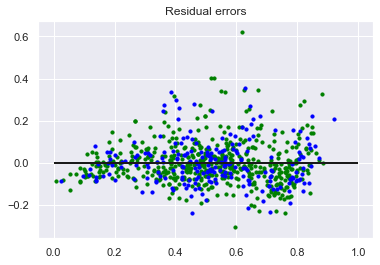

In [106]:
plt.scatter(lm_7.predict(X_train_lm), lm_7.predict(X_train_lm) - y_train, 
            color = "green", s = 10, label = 'Train data')

plt.scatter(lm_7.predict(X_test_new), lm_7.predict(X_test_new) - y_test, 
            color = "blue", s = 10, label = 'Test data')

plt.hlines(y = 0, xmin = 0, xmax = 1.0, linewidth = 2)

plt.title("Residual errors") 

plt.show()

Text(0, 0.5, 'y_pred')

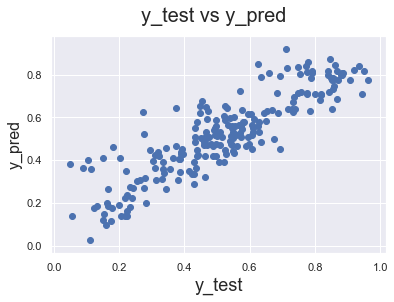

In [87]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

### <font color = green> The equation of the best fit line is:

#### <font color = red > cnt = 0.0788 + 0.2389 * yr + 0.0482 * workingday + 0.5515 * temp - 0.1839 * windspeed + 0.0875 * summer + 0.1174 * winter + 0.0874 * Sep + 0.0593 * Sat - 0.0677 * Fair